## Actively Funded Health Companies 

### Import Relevant Pandas Libraries

In [69]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.plotly 
#import download_plotlyjs,init_notebook_mode,plot,iplot
#init_notebook_mode(connected=True)
df = pd.read_excel("DHFin1.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 28 columns):
Company                          858 non-null object
URL                              839 non-null object
Company Description              858 non-null object
All Investors                    858 non-null object
Total Funding                    858 non-null float64
Sector                           858 non-null object
Industry                         857 non-null object
Sub-Industry                     638 non-null object
Country                          858 non-null object
State                            858 non-null object
City                             854 non-null object
VC Backed                        858 non-null object
Exit Round                       182 non-null object
Exit Date                        182 non-null object
Last Funding Round               858 non-null object
Last Funding Date                858 non-null object
Last Funding Amount              858 non-null 

### Removes spaces from columns names and convert all values to numeric type

In [70]:
df = df.rename(columns={'Total Funding': 'TotalFunding', 'Last Funding Amount': 'LastFundingAmount'})

In [71]:
df = df[pd.to_numeric(df.TotalFunding, errors='coerce').notnull()]

### Counts all unique states with actively funded health companies

In [72]:
df1= df['State'].value_counts()

### Create a Distrubution Plot of TotalFunding
#### As you can see  the funding is unevenly distrubuted towards one side as a small amount of the companies are receiving most of the money 

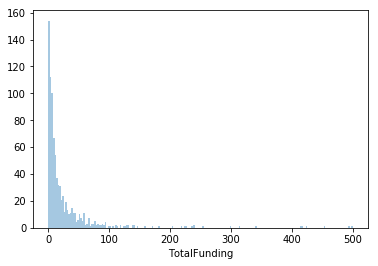

In [73]:
sns.distplot(df['TotalFunding'],kde = False,bins=200)


### Create a Linear Regression to identify if a correlation exists between TotalFunding and Contacts
#### Although the majority of points are distributed near the bottom of the graph there is a mild positive correlation 


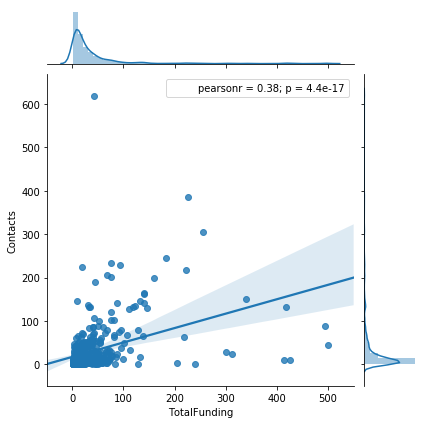

In [74]:
sns.jointplot(x='TotalFunding', y = 'Contacts', data = df ,kind ='reg') 

### Take the number of unique state, sector and lastfundingrounds sum these unique values and look for any correlation between total funding and last funding amount
#### A strong correlation between a companies total funding and last funding amount. 


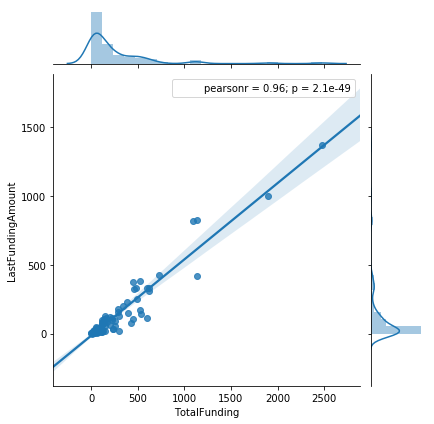

In [75]:
df['State'].value_counts() #Takes a count of the freq of all the values 
df['Sector'].value_counts()
df['Last Funding Simplified Round'].value_counts()
dfGroup = df.groupby(['Sector','Last Funding Simplified Round'])[['TotalFunding','LastFundingAmount']].sum() 
sns.jointplot(x='TotalFunding', y = 'LastFundingAmount', data = dfGroup ,kind ='reg') 


#Misc Graphs

#df.sort(columns = ['Industry'])
#df['Ratio']=(df['Total Funding'] - df['Last Funding Amount'])/df['Total Funding']

### Split all data values and convert to data time index  
### Create graph of funding by period, last funding amount and sector
#### We notice that certain industries such as mobile and internet have spikes throughout the year but increase signifcantly near the end of the year. Other industries such as health are more random and difficult to predict. 
##### Note: If the graphs are difficult to read please feel free to look at the pdf file of the graphs for further analysis.   


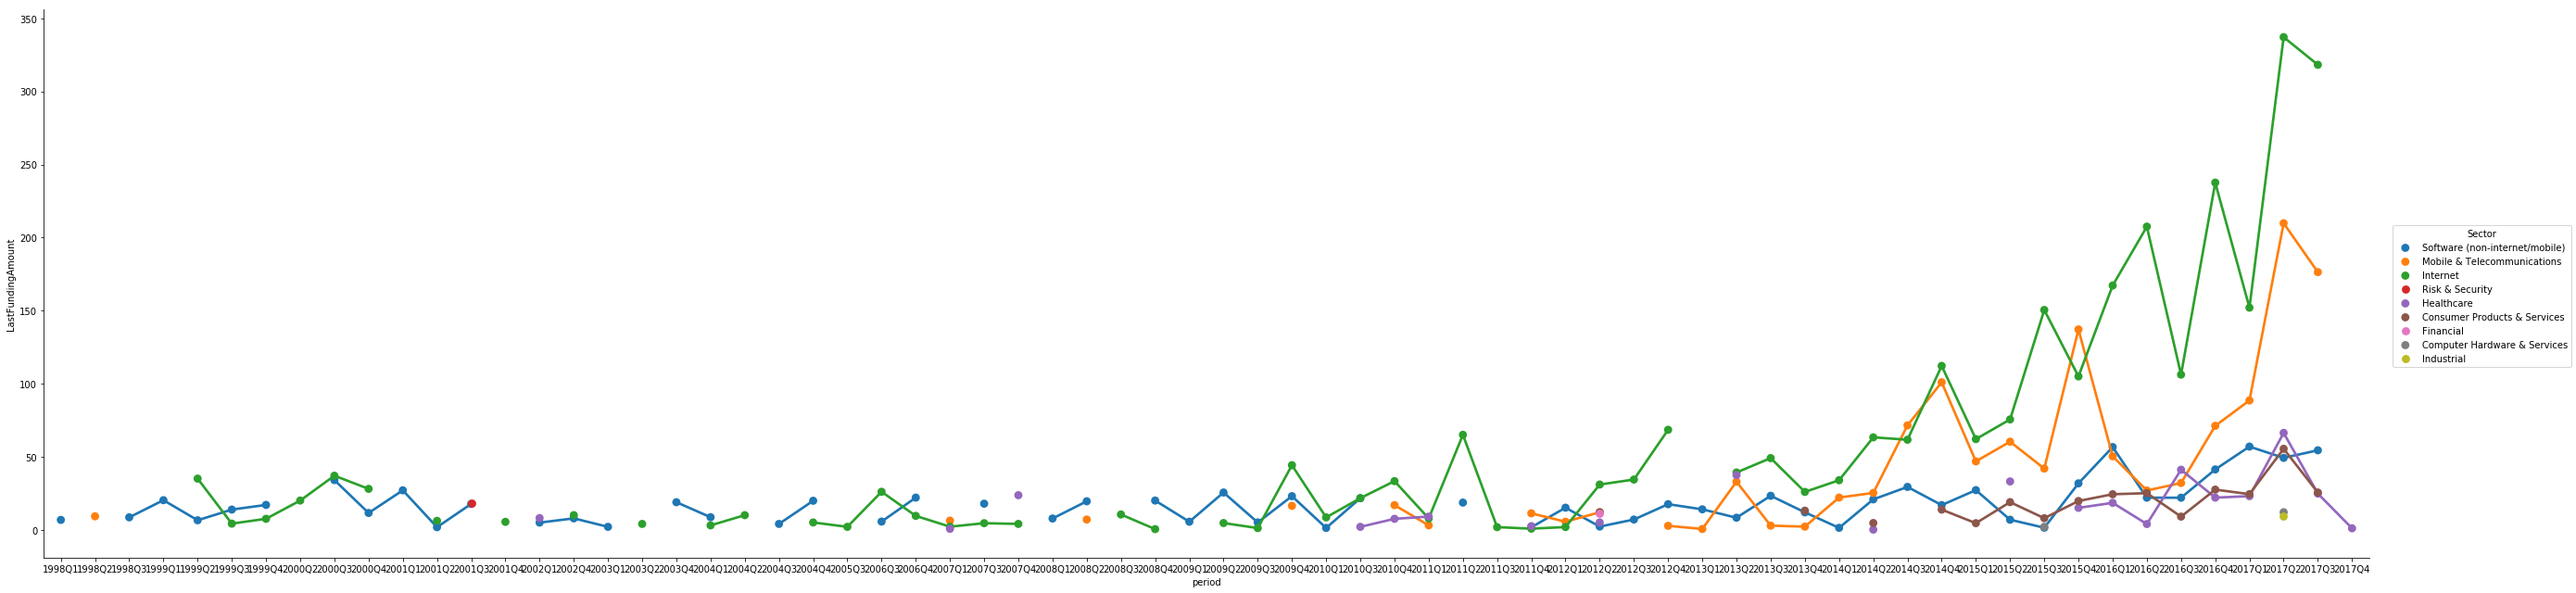

In [76]:
df['Qtr']=pd.DatetimeIndex(df['Last Funding Date']).quarter
df['Year']=pd.DatetimeIndex(df['Last Funding Date']).year
df['Month']=pd.DatetimeIndex(df['Last Funding Date']).month

df["period"] = df["Year"].map(str) +"Q" + df["Qtr"].map(str)
#df["period"] = df['period'].str[2:]



df1 = df[df["LastFundingAmount"] < 40]
df1 = df1.groupby(['period','Sector'])[['LastFundingAmount']].sum()
df1.reset_index(inplace=True)
df1
#sns.stripplot(x='period', y='LastFundingAmount',data =df1, jitter = True, hue = 'Sector', split= True, size =2, aspect =1)
factorplot = sns.factorplot("period", "LastFundingAmount", "Sector", df1, size=9, aspect=4)
fig = factorplot.fig
fig.savefig('SectorAnalysisOverTime.jpeg')



